Problem 1 :
How many traffic stop-involved police killings (TSPKs) are there in total? What proportion of all police killings do TSPKs comprise?

In [37]:
!pip install us

  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11942 sha256=f354587754c52ebef7b62ff659f68b8c9d97393eac30ebb30ad7bc0720cfde82
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1a\93\5b\98d3861ec2c4a9d90b16324c6f8d7e4db03e6a830bc993adbb
  Created wheel for jellyfish: filename=jellyfish-0.6.1-py3-none-any.whl size=10378 sha256=b147a7b217f102d884bd8e71a7d8f6f836d76228420096833f7ab4df1300d0c3
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e6\7d\be\a937dbd1f988778a15011a563ac3a12917103bfc25ff6cb473
Successfully built us jellyfish


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import us

In [4]:
df = pd.read_csv("D://police_killings.csv",low_memory=False)
df.head()

,name,age,gender,race,date,street_address,city,state,zip,county,...,prosecutor_gender,prosecutor_special,prosecutor_url,prosecutor_in_court,possible_suicide,alert_ids,prosecutor_party,prosecutor_term,independent_investigation,officer_race_inferred
0,Joseph Fuller,24.0,Male,White,2015-07-21,1300 NE 50th Ct,Oakland Park,FL,33334.0,Broward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shane K. Jones,38.0,Male,Black,2020-11-16,161 SW 19th Ct.,Dania Beach,FL,330004.0,Broward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,John Ethan Carpentier,26.0,Male,White,2016-09-27,20838 N 19th Ave,Phoenix,AZ,85027.0,Maricopa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mickee McArthur,28.0,Male,Black,2020-11-30,N. 9th Ave. and Langley Ave.,Ferry Pass,FL,32504.0,Escambia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mark Bess,33.0,Male,White,2016-04-30,4500 S 3200 W,Spanish Fork,UT,84660.0,Utah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['encounter_type'].value_counts()

Part 1 Violent Crime                                                     1469
Other Non-Violent Offense                                                1063
Domestic Disturbance                                                      658
Traffic Stop                                                              595
Mental Health/Welfare Check                                               569
Person with a Weapon                                                      464
None/Unknown                                                              438
Other Crimes Against People                                               200
Part 1 Violent Crime/Domestic disturbance                                 194
Other Crimes Against People/Domestic Disturbance                           80
Traffic Stop/Other Non-Violent Offense                                     49
Domestic Disturbance/Mental Health/Welfare Check                           12
Part 1 Violent Crime/Mental Health/Welfare Check                

In [7]:
# no of Traffic Stop Related Killings is equal to 595
total_killings = len(df)
kill_prop = 595/total_killings
print(kill_prop)

0.05751570807153214


There were a total of 595 Traffic Stop Related Killings (TSPK's) . Around 5.75% of the Total killings were Traffic Stop Related Killings

Problem 2:
What is the total number of incidents each year? How do TSPKs break down by race? What are the top 3 agencies responsible for the most TSPKs, and how many TSPKs are each responsible for?

In [8]:
# Creating a separate dataframe for Traffic Stop Related Killings
df1 = df[df['encounter_type']=="Traffic Stop"]

In [46]:
# Creating a new column year to get yearly TSPK incidents. For this, first convert date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])
df1['Year'] =  df1['date'].dt.year
# Using value_counts to get no of yearly TSPK incidents
counts = df1['Year'].value_counts()
print(counts)

2020    120
2019    118
2021    117
2018    115
2017     97
2022     28
Name: Year, dtype: int64


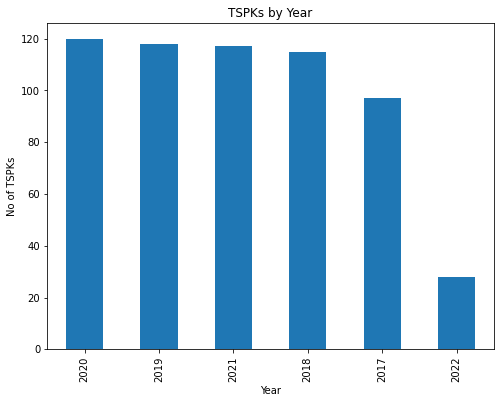

In [47]:
# Plotting TSPK's by Year
plt.figure(figsize=(8,6))
counts.plot(kind='bar')
plt.title('TSPKs by Year')
plt.xlabel('Year')
plt.ylabel('No of TSPKs')
plt.show()

The above gives incidents each year. 2020 had the highest incidents while 2022 had the lowest. However, data for 2022 is not for the whole year and is therefore incomplete

In [43]:
# Breakdown of TSPK's by Race. We could also have used groupby to get the same output. Value_counts has the benefit of ordering the counts in descending order
counts = df1['race'].value_counts()
print(counts)

White               227
Black               170
Hispanic             99
Unknown race         64
Native American      13
Asian                 9
Pacific Islander      6
Name: race, dtype: int64


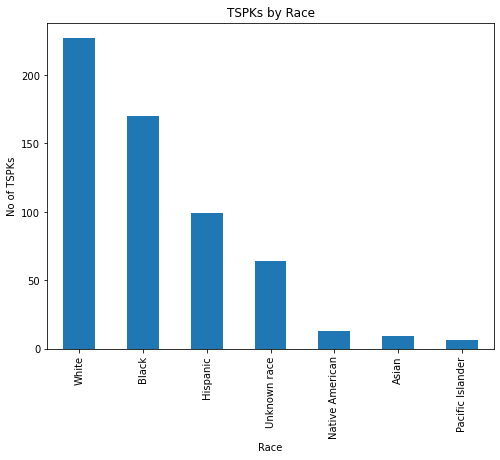

In [45]:
# plot of TSPK's by Race
plt.figure(figsize=(8,6))
counts.plot(kind='bar')
plt.title('TSPKs by Race')
plt.xlabel('Race')
plt.ylabel('No of TSPKs')
plt.show()

In [11]:
df1['agency_responsible'].value_counts()

California Highway Patrol                                         9
Los Angeles County Sheriff's Department                           8
Arizona Department of Public Safety                               7
Las Vegas Metropolitan Police Department                          6
Georgia State Patrol                                              5
                                                                 ..
Marshall County Sheriff's Office                                  1
South Carolina Highway Patrol                                     1
Grand Rapids Police Department                                    1
Mobile Police Department                                          1
"Bemidji Police Department","Beltrami County Sheriff's Office"    1
Name: agency_responsible, Length: 438, dtype: int64

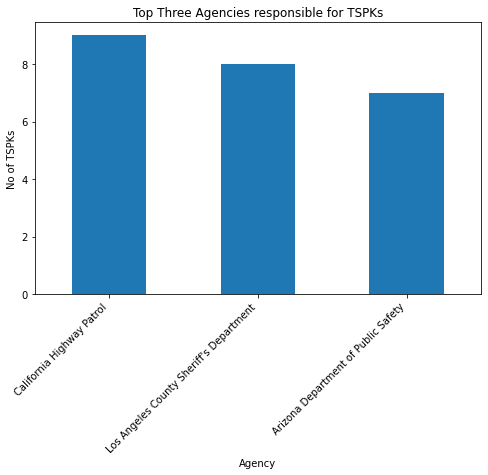

In [51]:
plt.figure(figsize=(8,5))
counts = df1['agency_responsible'].value_counts().nlargest(3)
ax = counts.plot(kind='bar')

# set the title and axis labels
ax.set_title('Top Three Agencies responsible for TSPKs')
ax.set_xlabel('Agency')
ax.set_ylabel('No of TSPKs')

# set the x-axis tick labels in a slanting manner
ax.set_xticklabels(counts.index, rotation=45, ha='right')

plt.show()

The top 3 agencies responsible for the TSPK's are California Highway Patrol, Los Angeles County Sheriff's Department and Arizona Department of Public Safety and their total incidents are 9, 8 and 7 respectively

Problem 3 : For every state, create a table containing the absolute number of TSPKs, broken down by race as well as the total for all races.
Create another table, but with TSPKs per capita instead of absolute numbers.


In [12]:
# Group by State and Race to obtain the TSPK's for each state broken down by race
grouped = df1.groupby(['state','race']).count()
df_state = grouped.reset_index().rename(columns={'age': 'cases'})[['state', 'race', 'cases']]
df_state['total_cases'] = df_state.groupby('state')['cases'].transform('sum')
df_state.head(n=10)

,state,race,cases,total_cases
0,AK,Native American,2,4
1,AK,Pacific Islander,1,4
2,AK,White,1,4
3,AL,Black,6,13
4,AL,Hispanic,1,13
5,AL,White,6,13
6,AR,Asian,1,15
7,AR,Black,6,15
8,AR,Unknown race,3,15
9,AR,White,5,15


In [13]:
df2 = pd.read_csv("D://race_eth_by_state_2020_census.csv")
df2.head()

,GEO_ID,NAME,TOTAL,HISPANIC,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,PACIFIC_ISLANDER,OTHER
0,id,Geographic Area Name,!!Total:,!!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,“!!Total:!!Population of one race:!!Some Other...
1,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
2,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
3,0400000US04,Arizona,7151502,2192253,3816547,317161,263930,248837,14323,298451
4,0400000US05,Arkansas,3011524,256847,2063550,449884,20549,51210,14280,155204


In [14]:
# removing the first row of the dataframe
df2 = df2[1:]
df2.head()

,GEO_ID,NAME,TOTAL,HISPANIC,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,PACIFIC_ISLANDER,OTHER
1,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
2,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
3,0400000US04,Arizona,7151502,2192253,3816547,317161,263930,248837,14323,298451
4,0400000US05,Arkansas,3011524,256847,2063550,449884,20549,51210,14280,155204
5,0400000US06,California,39538223,15579652,13714587,2119286,156085,5978795,138167,1851651


In [15]:
# police killing dataset has state codes while the census dataset has state names. So, we need to create a state code column in census dataset for merging the data
def state_code(state_name):
    code = us.states.lookup(state_name).abbr
    return code
# Creating a column called State in census data which contains the state code
df2['state'] = df2['NAME'].apply(state_code)


In [16]:
# Merging the state wise cases and census dataframes on the state column
df3 = pd.merge(df_state, df2, on ='state',how='left')
df3.head()

,state,race,cases,total_cases,GEO_ID,NAME,TOTAL,HISPANIC,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,PACIFIC_ISLANDER,OTHER
0,AK,Native American,2,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
1,AK,Pacific Islander,1,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
2,AK,White,1,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
3,AL,Black,6,13,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
4,AL,Hispanic,1,13,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073


In [17]:
df3['race'].value_counts()

White               42
Black               37
Unknown race        25
Hispanic            22
Native American      9
Asian                7
Pacific Islander     4
Name: race, dtype: int64

 Dropping rows where the race is stated as unknown. This data was useful in computing state wise total cases but has no use in computation of per capita cases for races or for the entire state. (Since race is not known) 

In [18]:
# Dropping rows where the race is stated as unknown. 
df3 = df3[df3['race'] != 'Unknown race']

In [19]:
# Reset Index after dropping rows
df3.reset_index(inplace=True)
df3.head(n=15)

,index,state,race,cases,total_cases,GEO_ID,NAME,TOTAL,HISPANIC,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,PACIFIC_ISLANDER,OTHER
0,0,AK,Native American,2,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
1,1,AK,Pacific Islander,1,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
2,2,AK,White,1,4,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
3,3,AL,Black,6,13,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
4,4,AL,Hispanic,1,13,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
5,5,AL,White,6,13,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
6,6,AR,Asian,1,15,0400000US05,Arkansas,3011524,256847,2063550,449884,20549,51210,14280,155204
7,7,AR,Black,6,15,0400000US05,Arkansas,3011524,256847,2063550,449884,20549,51210,14280,155204
8,9,AR,White,5,15,0400000US05,Arkansas,3011524,256847,2063550,449884,20549,51210,14280,155204
9,10,AZ,Black,3,22,0400000US04,Arizona,7151502,2192253,3816547,317161,263930,248837,14323,298451


In [20]:
# Function to obtain the per capita values for state broken down by race and also overall
# For per capita for races, divide cases by population of that race and for overall per capita cases divide by total population of state
def per_capita(df):
    for i in range(len(df)):
        s1 = df.loc[i,'race']
        if " " in s1:
            s2 = s1.split(" ")
            s2 = "_".join(s2)
            s2 = s2.upper()
        else:
            s2 = s1.upper()
        val = int(df.loc[i, s2])
        val1 = int(df.loc[i,'TOTAL'])
        df.loc[i,'cases'] =   df.loc[i,'cases']/val
        df.loc[i,'total_cases'] = df.loc[i,'total_cases']/val1
per_capita(df3)
df3.head()
  

,index,state,race,cases,total_cases,GEO_ID,NAME,TOTAL,HISPANIC,WHITE,BLACK,NATIVE_AMERICAN,ASIAN,PACIFIC_ISLANDER,OTHER
0,0,AK,Native American,0.000018,0.000005,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
1,1,AK,Pacific Islander,0.000080,0.000005,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
2,2,AK,White,0.000002,0.000005,0400000US02,Alaska,733391,49824,421758,20731,108838,43449,12455,76336
3,3,AL,Black,0.000005,0.000003,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073
4,4,AL,Hispanic,0.000004,0.000003,0400000US01,Alabama,5024279,264047,3171351,1288159,23119,75918,2612,199073


In [21]:
# Retaining the relevant columns
df3 = df3[['state','race','cases','total_cases']]
df3.head()

,state,race,cases,total_cases
0,AK,Native American,0.000018,0.000005
1,AK,Pacific Islander,0.000080,0.000005
2,AK,White,0.000002,0.000005
3,AL,Black,0.000005,0.000003
4,AL,Hispanic,0.000004,0.000003


In [22]:
# Sorting the dataframe by overall per capita cases in descending order
df3.sort_values(by='total_cases',ascending=False,inplace=True)
df3.head(n=15)

,state,race,cases,total_cases
0,AK,Native American,0.000018,0.000005
1,AK,Pacific Islander,0.000080,0.000005
2,AK,White,0.000002,0.000005
119,WY,Hispanic,0.000017,0.000005
120,WY,White,0.000004,0.000005
7,AR,Black,0.000013,0.000005
8,AR,White,0.000002,0.000005
6,AR,Asian,0.000020,0.000005
80,NM,Hispanic,0.000006,0.000005
79,NM,Black,0.000026,0.000005


Problem 5 :
Clean the agency_responsible field to re-evaluate top 3 agencies and their TSPK counts

In [23]:
# Code to rectify errors in data entry
df4 = df1.copy()
# Strip trailing and leading white spaces
df4['agency_responsible'] = df4['agency_responsible'].str.strip()
# Split the rows with multiple agencies listed
df4['agency_responsible'] = df4['agency_responsible'].str.split(',')
# Explode the list of agencies into separate rows
df4 = df4.explode('agency_responsible')
# Removing trailing and leading quotes generated while using the split function
df4['agency_responsible'] = df4['agency_responsible'].str.strip('""')

In [25]:
df4['agency_responsible'].value_counts()

Georgia State Patrol                       11
California Highway Patrol                  10
Los Angeles County Sheriff's Department     8
Arizona Department of Public Safety         8
Texas Department of Public Safety           6
                                           ..
Montgomery County OH Sheriff's Office       1
Pueblo County Sheriff's Office              1
Ball Police Department                      1
DC Metropolitan Police Department           1
Beltrami County Sheriff's Office            1
Name: agency_responsible, Length: 473, dtype: int64

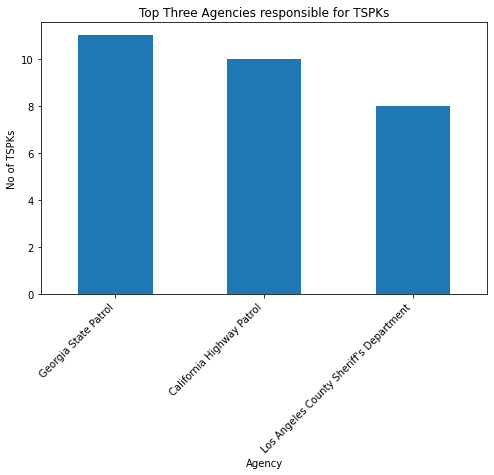

In [52]:
# Barplot after rectifying errors in data entry
plt.figure(figsize=(8,5))
counts = df4['agency_responsible'].value_counts().nlargest(3)
ax = counts.plot(kind='bar')

# set the title and axis labels
ax.set_title('Top Three Agencies responsible for TSPKs')
ax.set_xlabel('Agency')
ax.set_ylabel('No of TSPKs')

# set the x-axis tick labels in a slanting manner
ax.set_xticklabels(counts.index, rotation=45, ha='right')

plt.show()

After removing the trailing spaces and separating rows with multiple values in agencies_responsible column, there is a change in the results from those computed in Part 2. Georgia State Patrol now has the highest number of incidents now (11). It earlier had 5 incidents. California Highway Patrol and Los Angeles Sheriff's Department have the second and third highest incidents of 10 and 8 respectively. California earlier had 9 incidents.